In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller, kpss

In [7]:
data = pd.read_csv('Metrail+dataset.csv')
data.columns = ['Month', 'Travellers']
data.head()

,Month,Travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [8]:
data.shape

(159, 2)

In [9]:
data.isnull().sum()

Month          0
Travellers    11
dtype: int64

In [20]:
round(data.Travellers.interpolate(method='linear').mean(), 2)

1836.57

In [15]:
# Last value observed
round(data.Travellers.fillna(method='pad').mean(), 2)

1838.69

In [21]:
# Last value observed
round(data.Travellers.fillna(method='bfill').mean(), 2)

1834.45

In [49]:
data = pd.read_csv('./exchange-rate-twi.csv')
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [50]:
data['Exchange Rate TWI'].mean()

78.60032894736842

In [51]:
train_len = 212
train = data[:train_len]
test = data[train_len:]
train.shape, test.shape

((212, 2), (92, 2))

In [52]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len - 1]
y_hat_naive.head()

,Month,Exchange Rate TWI,naive_forecast
212,213,52.5,52.0
213,214,53.1,52.0
214,215,53.8,52.0
215,216,55.2,52.0
216,217,58.9,52.0


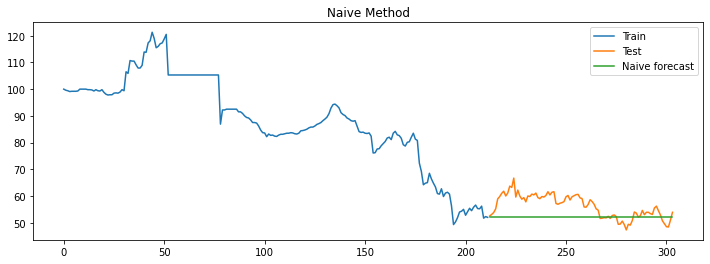

In [53]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [54]:
y_hat_naive['naive_forecast'].mean()

52.0

In [56]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,4.66,6.96
0,Simple average method,32.42,58.12
0,Simple average method,32.42,58.12
0,Simple average method,32.42,58.12


## Simple Avg Method

In [57]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()

In [75]:
y_hat_sma = data.copy()
window = 3
y_hat_sma['sma_forecast'] = data['Exchange Rate TWI'].rolling(window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


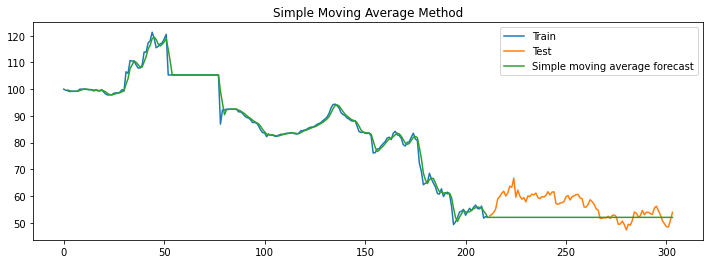

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,5.98,8.41


In [78]:
train['Exchange Rate TWI'].mean()

88.3254716981132

In [96]:
data = pd.read_csv('./Daily+temperature+data.csv')
data.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [97]:
# data.index = data['Date']
# data.head()

In [98]:
train_len = 511
train = data[:train_len]
test = data[train_len:]

train.shape, test.shape

((511, 2), (219, 2))

In [99]:
model = SimpleExpSmoothing(data['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 14.3,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)
y_hat_ses.head()

,Date,Temperature(Min),ses_forecast
511,5/27/2018,8.2,NaN
512,5/28/2018,6.1,NaN
513,5/29/2018,4.5,NaN
514,5/30/2018,6.1,NaN
515,5/31/2018,9.8,NaN


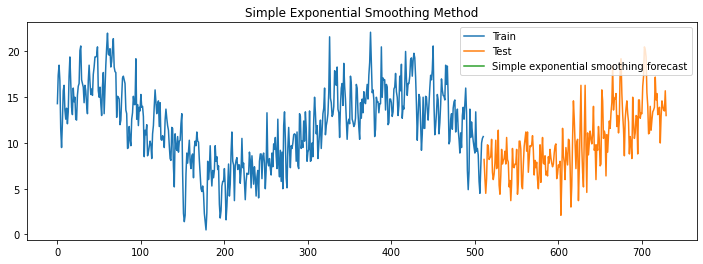

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

## Calculate RMSE and MAPE

In [102]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [109]:
data = pd.read_csv('./bitcoinfinal+(4).csv')
data.head()

,0,217.4
0,1,255.7
1,2,244.3
2,3,236.1
3,4,228.7
4,5,262.9


In [111]:
train_len = 29
train = data[:train_len]
test = data[train_len:]

In [112]:
train['217.4'].mean()

671.7275862068966

In [3]:
ts_data = pd.read_csv('./exchange-rate-twi.csv')

In [4]:
ts_data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [7]:
adf_results = adfuller(ts_data['Exchange Rate TWI'])
print('p-value ', round(adf_results[1], 2))

p-value  0.82


In [9]:
kpss_results = kpss(ts_data['Exchange Rate TWI'])
print('KPSS Statistics', round(kpss_results[0], 3))

KPSS Statistics 1.726
